In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
dados = pd.read_csv('/content/statusinvest-busca-avancada.csv', delimiter=';', decimal=',', thousands=".")

In [87]:
dados = dados.fillna(0)

In [88]:
dados.drop(dados[dados[' LIQUIDEZ MEDIA DIARIA'] < 500000].index, inplace=True)
dados.drop(dados[dados['P/L'] <= 1].index, inplace=True)
dados.drop(dados[dados['P/L'] > 30].index, inplace=True)
dados.drop(dados[dados['P/VP'] < 0].index, inplace=True)
dados.drop(dados[dados['P/VP'] > 4].index, inplace=True)
dados.drop(dados[dados['EV/EBIT'] <= 1].index, inplace=True)
dados.drop(dados[dados['EV/EBIT'] > 20].index, inplace=True)
dados.drop(dados[dados['ROE'] < 0].index, inplace=True)
dados.drop(dados[dados['ROE'] > 120].index, inplace=True)
dados.drop(dados[dados['EV/EBIT'] > 20].index, inplace=True)
dados.drop(dados[dados['PRECO'] == 0].index, inplace=True)


In [89]:
dados.drop( columns=[  'PRECO', 'P/ATIVOS', 'MARGEM BRUTA',
       'MARGEM EBIT', 'MARG. LIQUIDA', 'P/EBIT', 
       'DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'PSR', 'P/CAP. GIRO',
       'P. AT CIR. LIQ.', 'LIQ. CORRENTE', 'ROA', 'ROIC',
       'PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS', 'GIRO ATIVOS',
       'CAGR RECEITAS 5 ANOS', ' LIQUIDEZ MEDIA DIARIA',
       ' VPA', ' LPA', ' PEG Ratio', ' VALOR DE MERCADO', 'CAGR LUCROS 5 ANOS'], inplace=True)

In [90]:
len(dados)

155

In [ ]:
#otimização a fazer pós analise dos dados
#dados.drop(dados[dados['TICKER'] == 'BRIT3'].index, inplace=True)
#dados.drop(dados[dados['TICKER'] == 'FHER3'].index, inplace=True)

In [91]:
parteDados = dados

In [ ]:
parteDados

In [ ]:
parteDados.sort_values(by=['EV/EBIT'], ascending=True)

**Iniciaremos a tarefa de agrupamento de dados (CLUSTERING)** : 1-preparação



In [93]:
parteDados.dtypes

TICKER      object
DY         float64
P/L        float64
P/VP       float64
EV/EBIT    float64
ROE        float64
dtype: object

In [94]:
parteDados.describe()

,DY,P/L,P/VP,EV/EBIT,ROE
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,5.715871,9.629613,1.684581,7.723032,22.147742
std,5.412176,5.861179,0.935657,4.161725,14.902676
min,0.000000,1.830000,0.440000,1.020000,3.150000
25%,1.920000,5.275000,0.950000,4.615000,11.720000
50%,4.180000,7.800000,1.370000,6.910000,18.270000
75%,8.190000,13.195000,2.255000,11.110000,27.730000
max,25.370000,26.730000,3.890000,19.890000,99.930000


In [97]:
parteDados2 = parteDados
parteDados2.loc[999] = ['PRIME', 8, 5, 1, 4, 27]

In [ ]:
parteDados2

In [99]:
ticketsEmpresas = parteDados2['TICKER']

In [ ]:
ticketsEmpresas.values

In [101]:
xdata = parteDados2.drop(columns=['TICKER'])

In [ ]:
xdata

**pré-processar os dados para garantir mesma escala**

In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler 

In [104]:
#método min max [0...1]
scaler1 = MinMaxScaler()
scaler1.fit(xdata)
fdadosNoName = scaler1.transform(xdata)

In [ ]:
pd.DataFrame(fdadosNoName)

In [106]:
alg = KMeans(n_clusters=8, max_iter=1000)

In [107]:
alg.fit(fdadosNoName)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [108]:
grupos = alg.predict(fdadosNoName)

In [109]:
grupos

array([7, 1, 2, 7, 7, 7, 7, 0, 1, 7, 7, 7, 7, 4, 1, 6, 3, 3, 6, 2, 7, 7,
       1, 6, 7, 4, 7, 7, 0, 2, 0, 7, 3, 3, 1, 1, 1, 3, 0, 1, 3, 0, 7, 0,
       2, 2, 7, 7, 6, 0, 0, 1, 0, 7, 4, 2, 6, 1, 1, 6, 3, 3, 6, 3, 3, 6,
       6, 2, 6, 7, 7, 7, 7, 0, 0, 7, 2, 4, 6, 6, 3, 6, 1, 7, 2, 4, 2, 4,
       1, 5, 7, 5, 2, 4, 4, 7, 1, 1, 7, 7, 7, 2, 6, 0, 2, 2, 7, 7, 1, 1,
       1, 0, 7, 0, 7, 7, 7, 7, 7, 7, 7, 2, 7, 1, 0, 1, 6, 0, 0, 0, 4, 2,
       7, 0, 5, 5, 2, 2, 7, 3, 2, 6, 5, 5, 3, 3, 3, 0, 2, 6, 2, 2, 1, 5,
       6, 7], dtype=int32)

In [110]:
tickets = ticketsEmpresas.values

In [111]:
empresas = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[]}
for i in range(grupos.size):
    lista = empresas[grupos.item(i)]
    lista.append(str(tickets.item(i)))
    empresas[grupos.item(i)] = lista

In [ ]:
empresas[0]

In [113]:
#transforma um dicionário em um dataframe
dataGrupos = pd.DataFrame.from_dict(empresas, orient='index')
dataGrupos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,AURA33,CMIN3,CPFE3,CSNA3,DEXP3,DXCO3,ENGI11,EQTL3,ETER3,JALL3,JBSS3,PLPL3,RANI3,RAPT4,SLCE3,TAEE11,TAEE3,TAEE4,TIET11,VBBR3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,ABEV3,B3SA3,BPAC11,CARD3,CRFB3,CRPG5,CSAN3,CXSE3,ESPA3,FLRY3,FRAS3,LEVE3,MLAS3,OFSA3,PARD3,PTBL3,PTNT3,QUAL3,SIMH3,SMTO3,VVEO3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,AGRO3,BRPR3,COCE5,ELET3,ELET6,EZTC3,HBOR3,JPSA3,LOGG3,MDNE3,MRVE3,PFRM3,POMO3,POMO4,SBSP3,TEND3,TIMS3,TPIS3,TUPY3,VIIA3,VIVT4,VULC3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,BRAP3,BRAP4,CPLE3,CPLE6,CSMG3,CYRE3,GGBR3,GGBR4,GOAU3,GOAU4,LAVV3,TRPL4,USIM3,USIM5,VALE3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,BMOB3,CGRA4,EVEN3,KEPL3,LPSB3,MELK3,MTRE3,MYPK3,TECN3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,MOAR3,MRFG3,TIET3,TIET4,UNIP3,UNIP6,WIZS3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,BPAN4,BRFS3,CBAV3,ENEV3,FESA4,G2DI33,GMAT3,GRND3,GUAR3,HYPE3,LAME3,LAME4,LCAM3,PGMN3,SOJA3,UGPA3,VIVT3,WSON33,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,ABCB4,ALLD3,ALUP11,ALUP3,ALUP4,BBAS3,BBDC3,BBDC4,BMGB4,BRSR6,CAML3,CESP6,CMIG3,CMIG4,CPLE11,DIRR3,ENAT3,ENBR3,EUCA4,ITSA3,ITSA4,ITUB3,ITUB4,JHSF3,LIGT3,MOVI3,NEOE3,PCAR3,PETR3,PETR4,POSI3,PSSA3,RANI4,ROMI3,SANB11,SANB3,SANB4,SAPR11,SAPR3,SAPR4,SEER3,TGMA3,TRIS3,PRIME


In [115]:
alg.cluster_centers_

array([[0.24954671, 0.15845382, 0.47434783, 0.22048225, 0.37768651],
       [0.118813  , 0.478428  , 0.77929607, 0.50831504, 0.21188951],
       [0.11294657, 0.29572837, 0.16007905, 0.55203064, 0.08703902],
       [0.71252135, 0.07250335, 0.15458937, 0.10955662, 0.27644141],
       [0.12083388, 0.67746542, 0.18582931, 0.23717835, 0.02886271],
       [0.24815586, 0.19001721, 0.9047619 , 0.22431675, 0.56233578],
       [0.09978978, 0.70814369, 0.46135266, 0.70935642, 0.07953319],
       [0.22630523, 0.1748996 , 0.18353096, 0.22435805, 0.15863768]])

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

primeIndex = 5
euclidean_distances(alg.cluster_centers_, [alg.cluster_centers_[primeIndex]])

array([[1.04884241],
       [0.59745935],
       [1.06362443],
       [0.76929902],
       [1.32434098],
       [0.        ],
       [0.63435225],
       [0.77418841],
       [0.76091568],
       [0.79680155]])

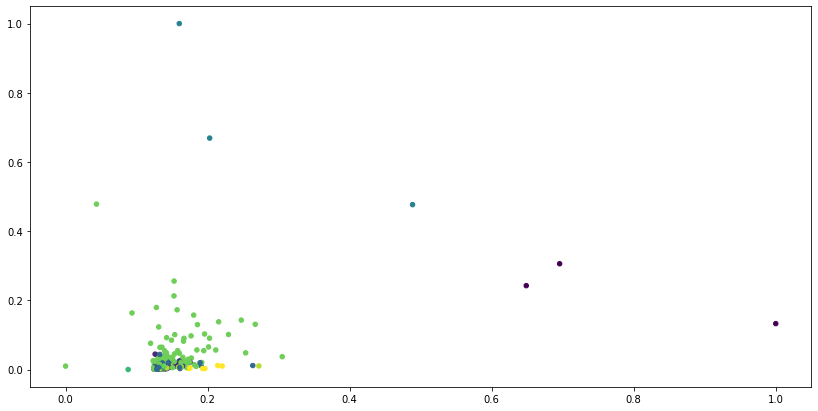

In [ ]:
plt.rcParams["figure.figsize"] = (14,7)
plt.scatter(fdadosNoName[:, 2], fdadosNoName[:, 1], c=grupos, s=20, cmap='viridis')

In [ ]:
xdata.columns

Index(['DY', 'P/L', 'P/VP', 'EV/EBIT', 'ROE', 'CAGR LUCROS 5 ANOS'], dtype='object')